# Problem statement
- To predict the house price

In [1]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
d1=pd.read_csv(r'E:\Data Is Everything\Edyoda\house-prices-advanced-regression-techniques\train.csv')

In [3]:
d1.sample(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
694,695,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,6,1936,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,927,927,GasA,TA,Y,SBrkr,1067,472,0,1539,0,0,1,1,3,1,TA,5,Typ,0,NaN,Detchd,1995.0,Unf,2,576,TA,TA,Y,112,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,141500
46,47,50,RL,48.0,12822,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Ex,TA,No,GLQ,1351,Unf,0,83,1434,GasA,Ex,Y,SBrkr,1518,631,0,2149,1,0,1,1,1,1,Gd,6,Typ,1,Ex,Attchd,2003.0,RFn,2,670,TA,TA,Y,168,43,0,0,198,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,239686
1151,1152,20,RL,134.0,17755,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,4,1959,1959,Gable,CompShg,HdBoard,Plywood,BrkFace,132.0,TA,TA,CBlock,TA,TA,No,BLQ,176,Unf,0,1290,1466,GasA,TA,Y,SBrkr,1466,0,0,1466,0,0,1,1,3,1,Fa,6,Typ,2,Gd,Attchd,1959.0,Fin,2,528,TA,TA,Y,0,140,0,0,100,0,NaN,NaN,NaN,0,11,2006,WD,Normal,149900
1360,1361,70,RL,51.0,9842,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,5,6,1921,1998,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,612,612,GasA,Ex,Y,SBrkr,990,1611,0,2601,0,0,3,1,4,1,TA,8,Typ,0,NaN,BuiltIn,1998.0,RFn,2,621,TA,TA,Y,183,0,301,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,189000
443,444,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,WdShing,Wd Shng,BrkFace,72.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1258,1258,GasA,Ex,Y,SBrkr,1258,0,0,1258,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,Fin,3,648,TA,TA,Y,144,16,0,0,0,0,NaN,NaN,NaN,0,6,2007,New,Partial,172500
762,763,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,24,Unf,0,732,756,GasA,Ex,Y,SBrkr,764,783,0,1547,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2009.0,Unf,2,614,TA,TA,Y,169,45,0,0,0,0,NaN,NaN,NaN,0,6,2010,Con,Normal,215200


# EDA

In [4]:
# To know the shape of the data
d1.shape

(1460, 81)

In [5]:
# Initial set of column names need to remove
col_to_remove=['Id','Alley','Street','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','OverallCond','YearRemodAdd','Exterior2nd','ExterCond','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','FireplaceQu','GarageYrBlt','GarageQual','GarageCars','GarageCond','PavedDrive','PoolQC','Fence','MiscVal','MoSold']

In [6]:
df=d1.drop(col_to_remove,axis=1)

In [305]:
df.shape # we redused to 37 columns now

(1460, 37)

In [7]:
df.sample(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Utilities,HouseStyle,OverallQual,YearBuilt,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,Foundation,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
1156,80,RL,85.0,9350,Reg,AllPub,SLvl,5,1965,Gable,CompShg,BrkFace,NaN,0.0,PConc,GasA,1265,0,0,1265,6,Typ,1,Attchd,RFn,502,0,92,0,96,0,0,NaN,2008,WD,Normal,179900
663,85,RL,90.0,10012,Reg,AllPub,SFoyer,4,1972,Gable,CompShg,Plywood,NaN,0.0,CBlock,GasA,1181,0,0,1181,6,Typ,0,Detchd,RFn,588,0,0,180,0,0,0,NaN,2008,WD,Normal,137500
1311,20,RL,68.0,8814,Reg,AllPub,1Story,7,2005,Gable,CompShg,VinylSd,BrkFace,80.0,PConc,GasA,1274,0,0,1274,6,Typ,0,Attchd,RFn,508,264,98,0,0,0,0,NaN,2007,New,Partial,203000
1179,20,RL,77.0,8335,Reg,AllPub,1Story,5,1954,Gable,CompShg,Wd Sdng,NaN,0.0,Slab,GasA,1124,0,0,1124,5,Min2,1,NaN,NaN,0,0,36,190,0,0,0,NaN,2006,WD,Normal,93000
346,20,RL,NaN,12772,IR1,AllPub,1Story,6,1960,Hip,CompShg,MetalSd,NaN,0.0,CBlock,GasA,958,0,0,958,5,Typ,0,Attchd,RFn,301,0,0,0,0,0,0,Gar2,2007,WD,Normal,151500
761,30,RM,60.0,6911,Reg,AllPub,1Story,5,1924,Gable,CompShg,Wd Sdng,NaN,0.0,PConc,GasA,1301,0,0,1301,5,Min1,0,Detchd,Unf,440,0,0,0,0,0,0,NaN,2009,WD,Normal,100000


In [8]:
print(d1['YearRemodAdd'].nunique())
print(d1['YearRemodAdd'].unique())

61
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


In [9]:
col_list=['LotArea','LotShape','MasVnrType']
df=df.drop(col_list,axis=1)

In [10]:
df.shape# We have 34 columns and 1460 homes list

(1460, 34)

In [11]:
# Exploring data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   Utilities      1460 non-null   object 
 4   HouseStyle     1460 non-null   object 
 5   OverallQual    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   RoofStyle      1460 non-null   object 
 8   RoofMatl       1460 non-null   object 
 9   Exterior1st    1460 non-null   object 
 10  MasVnrArea     1452 non-null   float64
 11  Foundation     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  Function

In [12]:
# Checking for null values
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
Utilities           0
HouseStyle          0
OverallQual         0
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
MasVnrArea          8
Foundation          0
Heating             0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
GarageType         81
GarageFinish       81
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscFeature      1406
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [13]:
df['MiscFeature'].isnull().sum()/len(df)*100 # We have 96% of null values we can drop this feature

96.30136986301369

In [14]:
df=df.drop('MiscFeature',axis=1)

In [15]:
# Filling the values with th forword fill technique
df['LotFrontage']=df['LotFrontage'].fillna(method='ffill')

In [16]:
# Filling categorical variable with the mode
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
si

SimpleImputer(strategy='most_frequent')

In [17]:
df[['GarageType']]=si.fit_transform(df[['GarageType']])
df[['GarageFinish']]=si.fit_transform(df[['GarageFinish']])

In [18]:
df.isnull().sum()# We succesfully removed all null values

MSSubClass       0
MSZoning         0
LotFrontage      0
Utilities        0
HouseStyle       0
OverallQual      0
YearBuilt        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
MasVnrArea       8
Foundation       0
Heating          0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [19]:
df.sample(6)

,MSSubClass,MSZoning,LotFrontage,Utilities,HouseStyle,OverallQual,YearBuilt,RoofStyle,RoofMatl,Exterior1st,MasVnrArea,Foundation,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
268,30,RM,71.0,AllPub,1Story,5,1940,Gable,CompShg,VinylSd,0.0,CBlock,GasA,778,0,0,778,4,Typ,1,Detchd,Fin,924,0,25,0,0,0,0,2008,WD,Normal,120500
207,20,RL,40.0,AllPub,1Story,4,1960,Gable,CompShg,Wd Sdng,0.0,PConc,GasA,1100,0,0,1100,6,Typ,1,Attchd,RFn,312,355,0,0,0,0,0,2008,WD,Normal,141000
581,20,RL,98.0,AllPub,1Story,8,2008,Hip,CompShg,VinylSd,306.0,PConc,GasA,2042,0,0,2042,8,Typ,1,Attchd,RFn,1390,0,90,0,0,0,0,2009,New,Partial,253293
244,60,RL,75.0,AllPub,2Story,7,1994,Gable,CompShg,VinylSd,0.0,PConc,GasA,1222,888,0,2110,8,Typ,2,Attchd,RFn,463,0,130,0,0,0,0,2010,WD,Normal,205000
708,60,RL,65.0,AllPub,2Story,7,2007,Hip,CompShg,VinylSd,0.0,PConc,GasA,728,728,0,1456,8,Typ,1,Attchd,Fin,400,100,24,0,0,0,0,2007,New,Partial,179540
884,20,RL,65.0,AllPub,1Story,5,1967,Gable,CompShg,HdBoard,60.0,CBlock,GasA,892,0,0,892,5,Typ,0,Attchd,RFn,288,0,0,0,0,0,0,2009,WD,Normal,100000


In [20]:
MZ_col={'RL':201,'RM':202,'C (all)':203,'FV':204,'RH':205}
df['MSZoning']=df['MSZoning'].map(MZ_col)# We changed one categorical variable using label encoding

In [21]:
df=df.drop('Utilities',axis=1)

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [23]:
House_col={'2Story':401,'1Story':402,'1.5Fin':403,'1.5Unf':404,'SFoyer':405,'SLvl':406,'2.5Unf':407,'2.5Fin':408}
df['HouseStyle']=df['HouseStyle'].map(House_col)

In [24]:
df.drop('RoofMatl',axis=1,inplace=True) # Removing the column from the data

In [25]:
roof_col={'Gable':5400,'Hip':5401,'Gambrel':5042,'Mansard':5403,'Flat':5403,'Shed':5404}
df['RoofStyle']=df['RoofStyle'].map(roof_col)

In [26]:
ext_col={'VinylSd':5500,'MetalSd':5501,'Wd Sdng':5502,'HdBoard':5503,'BrkFace':5504,'WdShing':5505,'CemntBd':5506,'Plywood':5507,'AsbShng':5508,'Stucco':5509,'BrkComm':5510,'AsphShn':5511,'Stone':5512,'ImStucc':5513,'CBlock':5514}
df['Exterior1st']=df['Exterior1st'].map(ext_col)

In [27]:
df.drop(columns='GarageFinish',inplace=True)

In [28]:
df.sample(6)

,MSSubClass,MSZoning,LotFrontage,HouseStyle,OverallQual,YearBuilt,RoofStyle,Exterior1st,MasVnrArea,Foundation,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
1077,20,201,60.0,402,5,1969,5400,5500,0.0,CBlock,GasA,1096,0,0,1096,6,Typ,0,Attchd,299,240,32,0,0,0,0,2006,WD,Abnorml,138800
1017,120,201,73.0,402,8,1984,5400,5503,0.0,CBlock,GasA,1360,0,0,1360,4,Typ,1,Attchd,565,63,0,0,0,0,0,2009,COD,Abnorml,187500
573,80,201,76.0,406,7,2000,5400,5500,0.0,PConc,GasA,774,656,0,1430,8,Typ,1,BuiltIn,400,100,0,0,0,0,0,2007,WD,Normal,170000
438,30,201,40.0,402,5,1913,5400,5505,0.0,PConc,GasA,694,0,0,694,4,Typ,1,Detchd,352,0,0,34,0,0,0,2007,WD,Normal,90350
932,20,201,84.0,402,9,2006,5401,5500,302.0,PConc,GasA,1905,0,0,1905,8,Typ,1,Attchd,788,0,191,0,0,0,0,2007,WD,Normal,320000
509,20,201,80.0,402,5,1959,5400,5501,132.0,CBlock,GasA,1041,0,0,1041,6,Typ,0,Attchd,270,224,88,0,0,0,0,2009,WD,Normal,124500


In [29]:
fond_col={'PConc':3200,'CBlock':3201,'BrkTil':3202,'Wood':3203,'Slab':3203,'Stone':3204}
df['Foundation']=df['Foundation'].map(fond_col)

In [30]:
heat_col={'GasA':5648,'GasW':5649,'Grav':5650,'Wall':5651,'OthW':5652,'Floor':5653}
df['Heating']=df['Heating'].map(heat_col)

In [31]:
df.drop(columns='Functional',inplace=True)

In [32]:
gar_col={'Attchd':7000,'Detchd':7001,'BuiltIn':7002,'CarPort':7003,'Basment':7004,'2Types':7005}
df['GarageType']=df['GarageType'].map(gar_col)

In [33]:
sale_col={'WD':8004,'New':8005,'COD':8006,'ConLD':8007,'ConLI':8008,'CWD':8009,'ConLw':8010,'Con':8011,'Oth':8012}
df['SaleType']=df['SaleType'].map(sale_col)

In [34]:
cond_col={'Normal':9001,'Abnorml':9002,'Partial':9003,'AdjLand':9004,'Alloca':9005,'Family':9006}
df['SaleCondition']=df['SaleCondition'].map(cond_col)

In [35]:
df.info()# Now we have all values in integer and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   HouseStyle     1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   RoofStyle      1460 non-null   int64  
 7   Exterior1st    1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   Foundation     1460 non-null   int64  
 10  Heating        1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  TotRmsAbvGrd   1460 non-null   int64  
 16  Fireplaces     1460 non-null   int64  
 17  GarageType     1460 non-null   int64  
 18  GarageAr

# Feater Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss

StandardScaler()

In [37]:
tt=ss.fit_transform(df)

In [38]:
df_scaled=pd.DataFrame(tt,columns=df.columns)

In [261]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.073375,-0.426561,-0.214138,-0.864245,0.651479,1.050994,0.079231,-0.879177,0.510015,-0.937172,-0.127554,-0.793434,1.161852,-0.120242,0.370333,0.912210,-0.951226,-0.593416,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,0.138777,-0.292103,-0.394337,0.347273
1,-0.872563,-0.426561,0.415088,-0.109130,-0.071836,0.156734,0.079231,-0.480172,-0.572835,0.389958,-0.127554,0.257140,-0.795163,-0.120242,-0.482512,-0.318683,0.600495,-0.593416,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.614439,-0.292103,-0.394337,0.007288
2,0.073375,-0.426561,-0.088293,-0.864245,0.651479,0.984752,0.079231,-0.879177,0.322174,-0.937172,-0.127554,-0.627826,1.189351,-0.120242,0.515013,-0.318683,0.600495,-0.593416,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,0.138777,-0.292103,-0.394337,0.536154
3,0.309859,-0.426561,-0.423880,-0.864245,0.651479,-1.863632,0.079231,-0.081167,-0.572835,1.717089,-0.127554,-0.521734,0.937276,-0.120242,0.383659,0.296763,0.600495,0.651394,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-1.367655,-0.292103,0.732340,-0.515281
4,0.073375,-0.426561,0.582881,-0.864245,1.374795,0.951632,0.079231,-0.879177,1.360826,-0.937172,-0.127554,-0.045611,1.617877,-0.120242,1.299326,1.527656,0.600495,-0.593416,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,0.138777,-0.292103,-0.394337,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.426561,-0.339983,-0.864245,-0.071836,0.918511,0.079231,-0.879177,-0.572835,-0.937172,-0.127554,-0.542435,0.795198,-0.120242,0.250402,0.296763,0.600495,-0.593416,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.614439,-0.292103,-0.394337,-0.074560
1456,-0.872563,-0.426561,0.624830,-0.109130,-0.071836,0.222975,0.079231,1.913856,0.084610,0.389958,-0.127554,2.355701,-0.795163,-0.120242,1.061367,0.296763,2.152216,-0.593416,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,1.645210,-0.292103,-0.394337,0.366161
1457,0.309859,-0.426561,-0.172189,-0.864245,0.651479,-1.002492,0.079231,1.514851,-0.572835,4.371350,-0.127554,0.065656,1.844744,-0.120242,1.569647,1.527656,2.152216,-0.593416,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,1.645210,-0.292103,-0.394337,1.077611
1458,-0.872563,-0.426561,-0.088293,-0.109130,-0.795151,-0.704406,0.111507,-0.480172,-0.572835,0.389958,-0.127554,-0.218982,-0.795163,-0.120242,-0.832788,-0.934130,-0.951226,-0.593416,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,1.645210,-0.292103,-0.394337,-0.488523


# Checking for coorilation 

<Axes: >

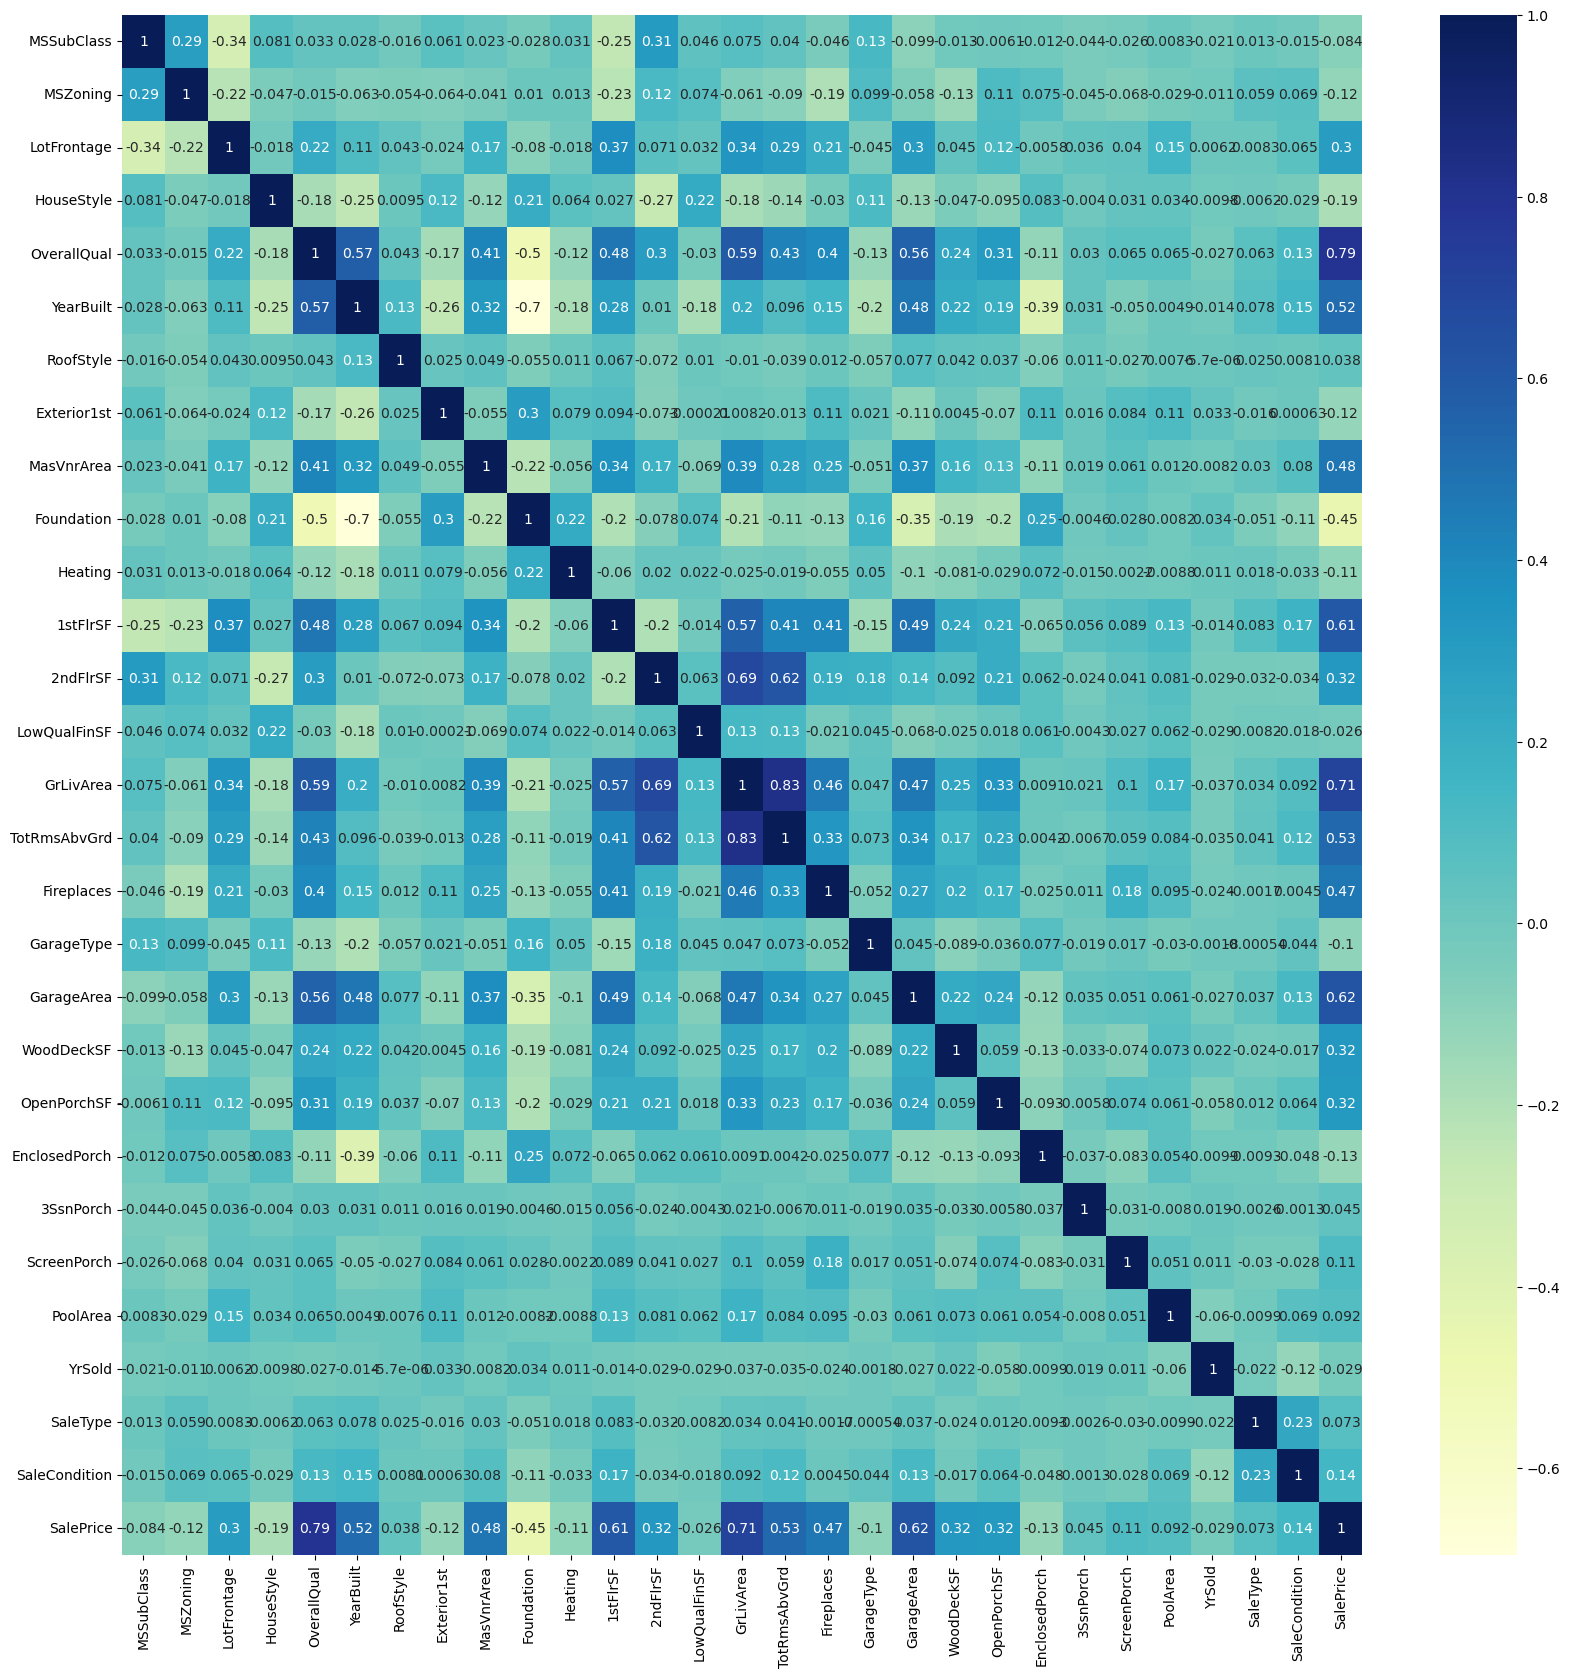

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df_scaled.corr(),annot=True,cmap='YlGnBu')

In [40]:
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,HouseStyle,OverallQual,YearBuilt,RoofStyle,Exterior1st,MasVnrArea,Foundation,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
163,45,201,55.0,404,4,1956,5400,5501,0.0,3201,5648,882,0,0,882,4,0,7000,0,0,0,0,0,0,0,2007,8004,9001,103200
186,80,201,90.0,406,7,1990,5400,5503,0.0,3200,5648,1217,0,0,1217,6,0,7000,497,168,27,0,0,0,0,2009,8004,9001,173000
1447,60,201,80.0,401,8,1995,5400,5500,438.0,3200,5648,1220,870,0,2090,8,1,7000,556,0,65,0,0,0,0,2007,8004,9001,240000
1310,20,201,100.0,402,7,1959,5400,5504,0.0,3200,5648,1902,0,0,1902,7,2,7000,567,0,207,162,0,0,0,2010,8004,9001,335000
1446,20,201,70.0,402,5,1962,5400,5503,189.0,3201,5648,1188,0,0,1188,6,0,7000,312,261,39,0,0,0,0,2010,8004,9001,157900
987,20,201,83.0,402,9,2009,5401,5500,450.0,3200,5648,1940,0,0,1940,8,1,7000,606,168,95,0,0,0,0,2010,8005,9003,395192
1448,50,201,70.0,401,4,1910,5400,5501,0.0,3201,5648,796,550,0,1346,6,0,7001,384,168,24,0,0,0,0,2007,8004,9001,112000
6,20,201,75.0,402,8,2004,5400,5500,186.0,3200,5648,1694,0,0,1694,7,1,7000,636,255,57,0,0,0,0,2007,8004,9001,307000
295,80,201,37.0,406,6,1984,5400,5503,0.0,3201,5648,1003,0,0,1003,6,0,7001,588,120,0,0,0,0,0,2006,8004,9001,142500
1021,20,201,64.0,402,7,2006,5400,5500,84.0,3200,5648,1220,0,0,1220,6,0,7000,632,105,54,0,0,0,0,2006,8005,9003,194000


In [41]:
# applying the machine learning 
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [43]:
# Splitting the data to train test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [44]:
x_train

,MSSubClass,MSZoning,LotFrontage,HouseStyle,OverallQual,YearBuilt,RoofStyle,Exterior1st,MasVnrArea,Foundation,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition
135,20,201,80.0,402,7,1970,5401,5507,288.0,3200,5648,1682,0,0,1682,7,1,7000,530,98,0,0,0,0,0,2008,8004,9001
1452,180,202,35.0,406,5,2005,5400,5500,80.0,3200,5648,1072,0,0,1072,5,0,7004,525,0,28,0,0,0,0,2006,8004,9001
762,60,204,72.0,401,7,2009,5400,5500,0.0,3200,5648,764,783,0,1547,7,0,7000,614,169,45,0,0,0,0,2010,8011,9001
932,20,201,84.0,402,9,2006,5401,5500,302.0,3200,5648,1905,0,0,1905,8,1,7000,788,0,191,0,0,0,0,2007,8004,9001
435,60,201,43.0,401,7,1996,5400,5500,0.0,3200,5648,827,834,0,1661,6,1,7000,550,158,61,0,0,0,0,2009,8010,9001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,201,78.0,402,6,2006,5400,5500,0.0,3200,5648,1314,0,0,1314,6,1,7000,440,0,22,0,0,0,0,2007,8004,9001
1130,50,201,65.0,403,4,1928,5400,5505,0.0,3202,5648,1328,653,0,1981,7,2,7001,576,431,44,0,0,0,0,2009,8004,9001
1294,20,201,60.0,402,5,1955,5401,5505,0.0,3201,5648,864,0,0,864,5,0,7001,572,0,0,0,0,0,0,2006,8004,9001
860,50,201,55.0,403,7,1918,5400,5502,0.0,3202,5648,912,514,0,1426,7,1,7001,216,0,240,0,0,0,0,2007,8004,9001


In [45]:
x_test

,MSSubClass,MSZoning,LotFrontage,HouseStyle,OverallQual,YearBuilt,RoofStyle,Exterior1st,MasVnrArea,Foundation,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition
892,20,201,70.0,402,6,1963,5401,5503,0.0,3201,5648,1068,0,0,1068,6,0,7000,264,192,0,0,0,0,0,2006,8004,9001
1105,60,201,98.0,401,8,1994,5400,5503,362.0,3200,5648,1500,1122,0,2622,9,2,7000,712,186,32,0,0,0,0,2010,8004,9001
413,30,202,56.0,402,5,1927,5400,5505,0.0,3201,5648,1028,0,0,1028,5,1,7001,360,0,0,130,0,0,0,2010,8004,9001
522,50,202,50.0,403,6,1947,5400,5506,0.0,3201,5648,1004,660,0,1664,7,2,7001,420,0,24,36,0,0,0,2006,8004,9001
1036,20,201,89.0,402,9,2007,5401,5500,70.0,3200,5648,1620,0,0,1620,6,1,7000,912,228,0,0,0,0,0,2009,8004,9001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20,201,70.0,402,5,1958,5400,5502,0.0,3201,5648,1056,0,0,1056,6,0,7000,308,0,0,0,0,0,0,2007,8004,9001
323,20,202,49.0,402,3,1955,5400,5500,0.0,3201,5648,1163,0,0,1163,6,0,7000,220,142,98,0,0,0,0,2006,8004,9001
650,60,204,65.0,401,7,2007,5400,5506,NaN,3200,5648,822,843,0,1665,7,0,7000,562,0,0,0,0,0,0,2008,8004,9001
439,50,201,67.0,403,6,1920,5400,5502,0.0,3202,5648,684,512,0,1196,7,0,7001,528,0,46,0,0,0,0,2009,8008,9001


In [46]:
y_train

135     174000
1452    145000
762     215200
932     320000
435     212000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1022, dtype: int64

In [47]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
331     139000
323     126175
650     205950
439     110000
798     485000
Name: SalePrice, Length: 438, dtype: int64

In [48]:
# Applying linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [58]:
lr.fit(x_train,y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values